<a href="https://colab.research.google.com/github/osoohynn/used-car-price-forecast/blob/main/used_car_price_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 중고차 가격 예측하기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
# 1. 데이터 로드 및 통합 (이전과 동일)
def load_and_combine_data():
    files = ['audi.csv', 'bmw.csv', 'cclass.csv', 'focus.csv', 'ford.csv',
             'hyundi.csv', 'merc.csv', 'skoda.csv', 'toyota.csv', 'vauxhall.csv', 'vw.csv']

    dataframes = []
    for file in files:
        df = pd.read_csv(f'../content/drive/MyDrive/{file}')
        df['brand'] = files.index(file)
        dataframes.append(df)

    combined_df = pd.concat(dataframes, ignore_index=True)
    print(f"\nTotal combined rows: {len(combined_df)}")
    return combined_df

In [ ]:
df = load_and_combine_data()
df


Total combined rows: 108540


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,tax(£)
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,0,NaN
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,0,NaN
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,0,NaN
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,0,NaN
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
108535,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0,10,NaN
108536,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2,10,NaN
108537,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4,10,NaN
108538,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2,10,NaN


In [ ]:
df.isnull().sum()
df.model.value_counts()

,count
model,
Focus,10042
C Class,7646
Fiesta,6557
Golf,4863
Corsa,3441
...,...
180,1
230,1
220,1


In [ ]:
df.drop('tax(£)', axis=1, inplace=True)
df.drop('model', axis=1, inplace=True)

In [ ]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)
df

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,0
1,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,0
2,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,0
3,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,0
4,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,0
...,...,...,...,...,...,...,...,...,...
94322,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0,10
94323,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2,10
94324,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4,10
94325,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2,10


In [ ]:
df.transmission.value_counts()
df.transmission.replace({'Manual': 0, 'Semi-Auto': 1, 'Automatic': 2, 'Other': 3}, inplace=True)
df

<ipython-input-8-89589efc9981>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.transmission.replace({'Manual': 0, 'Semi-Auto': 1, 'Automatic': 2, 'Other': 3}, inplace=True)
<ipython-input-8-89589efc9981>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.transmission.replace({'Manual': 0, 'Semi

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,2017,12500,0,15735,Petrol,150.0,55.4,1.4,0
1,2016,16500,2,36203,Diesel,20.0,64.2,2.0,0
2,2016,11000,0,29946,Petrol,30.0,55.4,1.4,0
3,2017,16800,2,25952,Diesel,145.0,67.3,2.0,0
4,2019,17300,0,1998,Petrol,145.0,49.6,1.0,0
...,...,...,...,...,...,...,...,...,...
94322,2012,5990,0,74000,Diesel,125.0,58.9,2.0,10
94323,2008,1799,0,88102,Petrol,145.0,46.3,1.2,10
94324,2009,1590,0,70000,Petrol,200.0,42.0,1.4,10
94325,2006,1250,0,82704,Petrol,150.0,46.3,1.2,10


In [ ]:
df.fuelType.value_counts()
df.fuelType.replace({'Petrol': 0, 'Diesel': 1, 'Hybrid': 2, 'Other': 3, 'Electric': 4, }, inplace=True)
df

<ipython-input-9-9ddabd39bfb1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.fuelType.replace({'Petrol': 0, 'Diesel': 1, 'Hybrid': 2, 'Other': 3, 'Electric': 4, }, inplace=True)
<ipython-input-9-9ddabd39bfb1>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fuelType.replace({'Petrol': 0, 'D

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,2017,12500,0,15735,0,150.0,55.4,1.4,0
1,2016,16500,2,36203,1,20.0,64.2,2.0,0
2,2016,11000,0,29946,0,30.0,55.4,1.4,0
3,2017,16800,2,25952,1,145.0,67.3,2.0,0
4,2019,17300,0,1998,0,145.0,49.6,1.0,0
...,...,...,...,...,...,...,...,...,...
94322,2012,5990,0,74000,1,125.0,58.9,2.0,10
94323,2008,1799,0,88102,0,145.0,46.3,1.2,10
94324,2009,1590,0,70000,0,200.0,42.0,1.4,10
94325,2006,1250,0,82704,0,150.0,46.3,1.2,10


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np


def prepare_features(df):
    print("\nPreparing features...")

    features = ['year', 'mileage', 'engineSize', 'transmission', 'fuelType', 'brand']
    if 'tax' in df.columns:
        features.append('tax')
    if 'mpg' in df.columns:
        features.append('mpg')

    print(f"Selected features: {features}")

    X = df[features]
    y = df['price']

    print(f"Feature matrix shape: {X.shape}")
    print(f"Target vector shape: {y.shape}")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler, features

# 4. 모델 학습 및 평가 (수정됨)
def train_randomforest_model(X_train, X_test, y_train, y_test, features):
    print("\nTraining model...")

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    return model

def train_gradientboosting_model(X_train, X_test, y_train, y_test, features):
    print("\nTraining model...")

    model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    return model

def evaluate_model(model, X_test, y_test, features):
    print("\nEvaluating model...")
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse) # 평균 제곱근 오차
    r2 = r2_score(y_test, y_pred) # R² 점수
    mape = mean_absolute_percentage_error(y_test, y_pred)  # 평균 절대 백분율 오차

    print(f"\n모델 성능 평가:")
    print(f"RMSE: £{rmse:.2f}")
    print(f"R² Score: {r2:.4f}")
    print(f"MAPE: {mape:.2%}")    # 평균 오차율

    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("\n특성 중요도:")
    print(feature_importance)

In [ ]:
X_train_scaled, X_test_scaled, y_train, y_test, scaler, features = prepare_features(df)
rf_model = train_randomforest_model(X_train_scaled, X_test_scaled, y_train, y_test, features)
gb_model = train_gradientboosting_model(X_train_scaled, X_test_scaled, y_train, y_test, features)

evaluate_model(rf_model, X_test_scaled, y_test, features)

train_score = rf_model.score(X_train_scaled, y_train) # 0.99
print(rf_model.score(X_test_scaled, y_test)) # 0.94

print("****************")

evaluate_model(gb_model, X_test_scaled, y_test, features)

print(gb_model.score(X_train_scaled, y_train)) # 0.99
print(gb_model.score(X_test_scaled, y_test)) # 0.94


Preparing features...
Selected features: ['year', 'mileage', 'engineSize', 'transmission', 'fuelType', 'brand', 'tax', 'mpg']
Feature matrix shape: (94327, 8)
Target vector shape: (94327,)

Training model...

Training model...

Evaluating model...

모델 성능 평가:
RMSE: £2299.13
R² Score: 0.9474
MAPE: 8.40%

특성 중요도:
        feature  importance
3  transmission    0.300351
2    engineSize    0.214326
0          year    0.209564
7           mpg    0.149444
1       mileage    0.058762
5         brand    0.036502
6           tax    0.023010
4      fuelType    0.008041
0.9473518753537766
****************

Evaluating model...

모델 성능 평가:
RMSE: £3281.56
R² Score: 0.8927
MAPE: 13.75%

특성 중요도:
        feature  importance
2    engineSize    0.330907
0          year    0.205806
3  transmission    0.201277
7           mpg    0.113083
1       mileage    0.096428
5         brand    0.042328
4      fuelType    0.007657
6           tax    0.002514
0.8958734694956971
0.8927454874361195


In [ ]:
# from sklearn.model_selection import cross_val_score

# # 교차 검증 점수
# cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)

# print("교차 검증 평균 점수:", cv_scores.mean())
# print("훈련 데이터 점수:", train_score)

# # 교차 검증 점수와 훈련 점수 차이 확인
# if train_score - cv_scores.mean() > 0.1:
#     print("오버피팅 발생 가능성 있음")

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

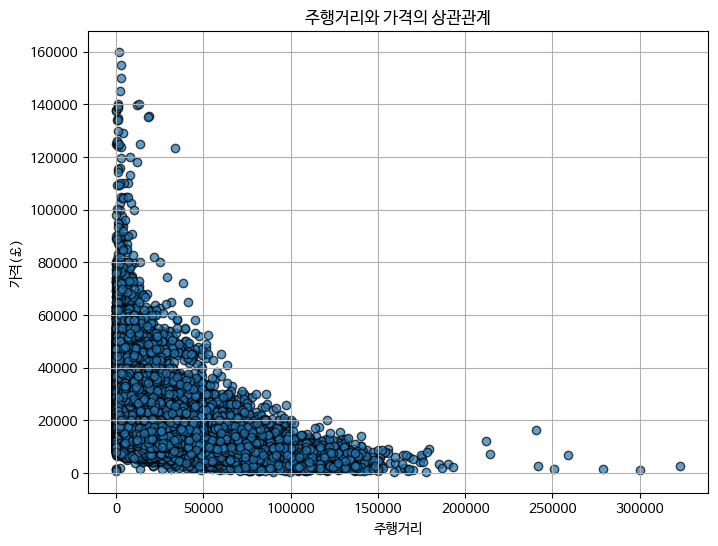

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['mileage'], df['price'], alpha=0.7, edgecolors='k')
plt.title("주행거리와 가격의 상관관계")
plt.xlabel("주행거리")
plt.ylabel("가격(£)")
plt.grid(True)
plt.show()

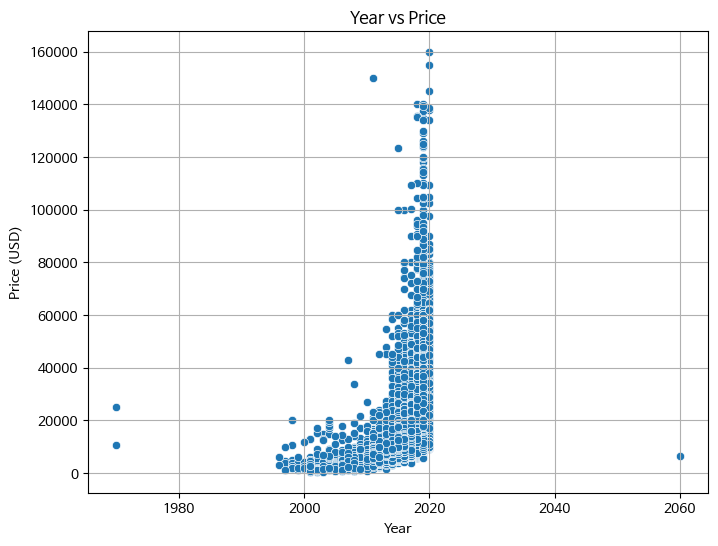

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='year', y='price', data=df)
plt.title("Year vs Price")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()

In [ ]:
"""
중고차 가격 예측 모델
이 프로그램은 자동차의 특성(연식, 주행거리 등)을 바탕으로 가격을 예측합니다.
RandomForest와 GradientBoosting 두 가지 모델을 사용하여 비교합니다.
"""

import pandas as pd  # 데이터 처리를 위한 라이브러리
import numpy as np   # 수학적 연산을 위한 라이브러리
from sklearn.model_selection import train_test_split  # 데이터 분할용
from sklearn.preprocessing import StandardScaler, LabelEncoder  # 데이터 전처리용
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # 머신러닝 모델
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error  # 성능 평가 지표
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')  # 경고 메시지 숨기기

class CarPricePredictor:
    """
    자동차 가격 예측을 위한 클래스
    이 클래스는 데이터 로드, 전처리, 모델 학습, 예측을 수행합니다.
    """

    def __init__(self):
        """
        클래스 초기화
        모델과 데이터 처리에 필요한 변수들을 준비합니다.
        """
        self.rf_model = None         # RandomForest 모델을 저장할 변수
        self.gb_model = None         # GradientBoosting 모델을 저장할 변수
        self.scaler = None           # 데이터 스케일링을 위한 변수
        self.features = None         # 입력 특성들을 저장할 변수
        self.processed_df = None     # 전처리된 데이터를 저장할 변수

    def load_and_combine_data(self):
        """
        여러 CSV 파일에서 데이터를 읽어와 하나로 합칩니다.

        Returns:
            combined_df: 모든 데이터가 합쳐진 데이터프레임
        """
        # 읽어올 파일 목록
        files = ['audi.csv', 'bmw.csv', 'cclass.csv', 'focus.csv', 'ford.csv',
                 'hyundi.csv', 'merc.csv', 'skoda.csv', 'toyota.csv', 'vauxhall.csv', 'vw.csv']

        dataframes = []  # 각 파일의 데이터를 저장할 리스트

        # 각 파일을 읽어서 리스트에 추가
        for file in files:
            try:
                df = pd.read_csv(f'/content/{file}')  # 파일 읽기
                print(f"Successfully loaded {file} with {len(df)} rows")
                df['brand'] = file.split('.')[0]  # 파일 이름을 브랜드로 저장
                dataframes.append(df)
            except Exception as e:
                print(f"Error loading {file}: {str(e)}")

        # 모든 데이터프레임 합치기
        combined_df = pd.concat(dataframes, ignore_index=True)
        print(f"\nTotal combined rows: {len(combined_df)}")
        return combined_df

    def preprocess_data(self, df):
        """
        데이터 전처리를 수행합니다.
        - 필요한 컬럼 선택
        - 결측치 처리
        - 데이터 타입 변환
        - 범주형 변수 인코딩

        Args:
            df: 원본 데이터프레임
        Returns:
            df: 전처리된 데이터프레임
        """
        print("\nStarting data preprocessing...")
        print(f"Initial shape: {df.shape}")

        # 필요한 컬럼만 선택
        essential_columns = ['model', 'year', 'price', 'transmission',
                           'mileage', 'fuelType', 'engineSize', 'brand']
        if 'tax' in df.columns:
            essential_columns.append('tax')
        if 'mpg' in df.columns:
            essential_columns.append('mpg')

        df = df[essential_columns]

        # 가격 데이터 정제 (£ 기호와 쉼표 제거)
        if df['price'].dtype == 'object':
            df['price'] = df['price'].str.replace('£', '', regex=False)\
                                    .str.replace(',', '', regex=False)\
                                    .str.replace(' ', '', regex=False)
            df['price'] = pd.to_numeric(df['price'], errors='coerce')

        # 주행거리 데이터 정제 (쉼표 제거)
        if df['mileage'].dtype == 'object':
            df['mileage'] = df['mileage'].str.replace(',', '', regex=False)
            df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')

        # 엔진 크기 데이터 숫자로 변환
        if df['engineSize'].dtype == 'object':
            df['engineSize'] = pd.to_numeric(df['engineSize'], errors='coerce')

        # 범주형 변수 인코딩 (텍스트를 숫자로 변환)
        le = LabelEncoder()
        categorical_columns = ['model', 'transmission', 'fuelType', 'brand']

        self.label_encoders = {}
        for col in categorical_columns:
            if col in df.columns:
                self.label_encoders[col] = LabelEncoder()
                df[col] = self.label_encoders[col].fit_transform(df[col].astype(str))

        # 결측치 처리
        if 'tax' in df.columns:
            df['tax'] = df['tax'].fillna(df['tax'].mean())
        if 'mpg' in df.columns:
            df['mpg'] = df['mpg'].fillna(df['mpg'].mean())

        # 필수 컬럼의 결측치가 있는 행 제거
        df = df.dropna(subset=['model', 'year', 'price', 'transmission',
                              'mileage', 'fuelType', 'engineSize'])

        print(f"Final shape after cleaning: {df.shape}")
        print("\nData summary after preprocessing:")
        print(df.describe())

        return df
    def prepare_features(self, df):
        """
        모델 학습을 위한 특성(features)을 준비합니다.
        - 입력 특성과 타겟(가격) 분리
        - 학습/테스트 데이터 분할
        - 데이터 스케일링(정규화)

        Args:
            df: 전처리된 데이터프레임
        Returns:
            X_train_scaled: 학습용 입력 데이터 (정규화됨)
            X_test_scaled: 테스트용 입력 데이터 (정규화됨)
            y_train: 학습용 타겟 데이터 (가격)
            y_test: 테스트용 타겟 데이터 (가격)
            scaler: 데이터 정규화에 사용된 스케일러
            features: 사용된 특성들의 목록
        """
        print("\n특성 준비 중...")

        # 입력 특성 선택
        features = ['year', 'mileage', 'engineSize', 'model',
                   'transmission', 'fuelType', 'brand']
        if 'tax' in df.columns:
            features.append('tax')
        if 'mpg' in df.columns:
            features.append('mpg')

        print(f"선택된 특성들: {features}")

        # 입력(X)과 타겟(y) 분리
        X = df[features]
        y = df['price']

        print(f"특성 행렬 크기: {X.shape}")
        print(f"타겟 벡터 크기: {y.shape}")

        # 학습/테스트 데이터 분할 (80% 학습, 20% 테스트)
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42)

        # 데이터 정규화 (평균 0, 표준편차 1로 스케일링)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        return X_train_scaled, X_test_scaled, y_train, y_test, scaler, features

    def train_and_evaluate_models(self, X_train, X_test, y_train, y_test, features):
        """
        두 가지 모델을 학습하고 교차검증으로 성능을 평가합니다.
        """
        print("\n모델 학습 및 평가 중...")

        # 교차 검증을 위한 KFold 설정
        kf = KFold(n_splits=5, shuffle=True, random_state=42)

        # RandomForest 모델 학습 및 교차 검증
        self.rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
        rf_cv_scores = []

        print("\nRandomForest 교차 검증 수행 중...")
        for fold, (train_idx, val_idx) in enumerate(kf.split(X_train), 1):
            # 폴드별 데이터 분할
            X_fold_train, X_fold_val = X_train[train_idx], X_train[val_idx]
            y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

            # 모델 학습
            self.rf_model.fit(X_fold_train, y_fold_train)
            # 검증
            val_pred = self.rf_model.predict(X_fold_val)
            fold_score = r2_score(y_fold_val, val_pred)
            rf_cv_scores.append(fold_score)
            print(f"Fold {fold} R² Score: {fold_score:.4f}")

        print(f"RandomForest 평균 교차 검증 R² Score: {np.mean(rf_cv_scores):.4f}")

        # 최종 테스트 데이터로 예측
        rf_pred = self.rf_model.predict(X_test)

        # GradientBoosting 모델 학습 및 교차 검증
        self.gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
        gb_cv_scores = []

        print("\nGradientBoosting 교차 검증 수행 중...")
        for fold, (train_idx, val_idx) in enumerate(kf.split(X_train), 1):
            # 폴드별 데이터 분할
            X_fold_train, X_fold_val = X_train[train_idx], X_train[val_idx]
            y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

            # 모델 학습
            self.gb_model.fit(X_fold_train, y_fold_train)
            # 검증
            val_pred = self.gb_model.predict(X_fold_val)
            fold_score = r2_score(y_fold_val, val_pred)
            gb_cv_scores.append(fold_score)
            print(f"Fold {fold} R² Score: {fold_score:.4f}")

        print(f"GradientBoosting 평균 교차 검증 R² Score: {np.mean(gb_cv_scores):.4f}")

        # 최종 테스트 데이터로 예측
        gb_pred = self.gb_model.predict(X_test)

        # 성능 평가
        models = {
            'RandomForest': (self.rf_model, rf_pred, rf_cv_scores),
            'GradientBoosting': (self.gb_model, gb_pred, gb_cv_scores)
        }

        model_metrics = {}
        print("\n최종 모델 성능 비교:")
        best_model = None
        best_score = float('-inf')

        for model_name, (model, predictions, cv_scores) in models.items():
            mse = mean_squared_error(y_test, predictions)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_test, predictions)
            mape = mean_absolute_percentage_error(y_test, predictions)

            model_metrics[model_name] = {
                'RMSE': rmse,
                'R2': r2,
                'MAPE': mape,
                'CV_Scores': cv_scores,
                'CV_Mean': np.mean(cv_scores),
                'CV_Std': np.std(cv_scores),
                'Predictions': predictions,
                'True_Values': y_test
            }

            print(f"\n{model_name} 모델:")
            print(f"RMSE: £{rmse:.2f}")
            print(f"R² Score: {r2:.4f}")
            print(f"MAPE: {mape:.2%}")
            print(f"교차 검증 R² Score: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})")

            if r2 > best_score:
                best_score = r2
                best_model = model_name

        print(f"\n최고 성능 모델: {best_model} (R² Score: {best_score:.4f})")

        return model_metrics

    def predict_price(self, new_data):
        """
        새로운 자동차 데이터의 가격을 예측합니다.

        Args:
            new_data: 예측하려는 자동차의 특성 데이터
        Returns:
            rf_predicted_price: RandomForest 모델의 예측 가격
            gb_predicted_price: GradientBoosting 모델의 예측 가격
        """
        # 새로운 데이터 정규화
        new_data_scaled = self.scaler.transform(new_data[self.features])

        # 두 모델로 가격 예측
        rf_predicted_price = self.rf_model.predict(new_data_scaled)
        gb_predicted_price = self.gb_model.predict(new_data_scaled)

        return rf_predicted_price, gb_predicted_price

    def evaluate_random_samples(self, n_samples=5):
        """
        데이터셋에서 무작위로 샘플을 선택하여 예측 정확도를 평가합니다.

        Args:
            n_samples: 평가할 샘플의 개수 (기본값: 5)
        Returns:
            results: 예측 결과와 오차를 담은 데이터프레임
            samples: 선택된 샘플 데이터
        """
        # 무작위로 샘플 선택
        sample_indices = np.random.choice(
            len(self.processed_df),
            n_samples,
            replace=False
        )
        samples = self.processed_df.iloc[sample_indices]

        print(f"\n{n_samples}개의 랜덤 샘플에 대한 예측 결과:")
        print("\n실제 데이터:")
        print(samples[['year', 'mileage', 'engineSize', 'model',
                      'transmission', 'fuelType', 'brand', 'price']].to_string())

        # 선택된 샘플에 대해 가격 예측
        sample_features = samples[self.features]
        actual_prices = samples['price']
        rf_prices, gb_prices = self.predict_price(sample_features)

        # 결과 분석을 위한 데이터프레임 생성
        results = pd.DataFrame({
            'Actual_Price': actual_prices,              # 실제 가격
            'RF_Predicted': rf_prices,                  # RF 모델 예측 가격
            'GB_Predicted': gb_prices,                  # GB 모델 예측 가격
            'RF_Difference': abs(actual_prices - rf_prices),  # RF 모델 오차
            'GB_Difference': abs(actual_prices - gb_prices),  # GB 모델 오차
            'RF_Error_Percentage': (abs(actual_prices - rf_prices) / actual_prices) * 100,  # RF 오차율
            'GB_Error_Percentage': (abs(actual_prices - gb_prices) / actual_prices) * 100   # GB 오차율
        })

        # 결과 출력
        print("\n예측 결과 및 오차:")
        print(results.to_string())

        print("\n평균 예측 오차율:")
        print(f"RandomForest 평균 오차율: {results['RF_Error_Percentage'].mean():.2f}%")
        print(f"GradientBoosting 평균 오차율: {results['GB_Error_Percentage'].mean():.2f}%")

        return results, samples

    def train(self):
        """
        전체 학습 프로세스를 실행합니다.
        데이터 로드부터 모델 학습까지 모든 과정을 순차적으로 수행합니다.

        Returns:
            model_metrics: 학습된 모델들의 성능 지표
        """
        try:
            # 1. 데이터 로드
            print("데이터 로드 중...")
            combined_df = self.load_and_combine_data()

            # 2. 데이터 전처리
            print("데이터 전처리 중...")
            self.processed_df = self.preprocess_data(combined_df)

            # 3. 특성 준비
            print("특성 준비 중...")
            X_train, X_test, y_train, y_test, self.scaler, self.features = \
                self.prepare_features(self.processed_df)

            # 4. 모델 학습 및 평가
            print("모델 학습 및 비교 중...")
            model_metrics = self.train_and_evaluate_models(
                X_train, X_test, y_train, y_test, self.features)

            return model_metrics

        except Exception as e:
            print(f"학습 중 오류 발생: {str(e)}")
            raise

# 메인 실행 코드
if __name__ == "__main__":
    # 예측기 객체 생성
    predictor = CarPricePredictor()

    # 모델 학습 수행
    model_metrics = predictor.train()

    # 랜덤 샘플로 예측 성능 테스트
    results, samples = predictor.evaluate_random_samples(n_samples=5)

데이터 로드 중...
Successfully loaded audi.csv with 10668 rows
Successfully loaded bmw.csv with 10781 rows
Successfully loaded cclass.csv with 3899 rows
Successfully loaded focus.csv with 5454 rows
Successfully loaded ford.csv with 17965 rows
Successfully loaded hyundi.csv with 4860 rows
Successfully loaded merc.csv with 13119 rows
Successfully loaded skoda.csv with 6267 rows
Successfully loaded toyota.csv with 6738 rows
Successfully loaded vauxhall.csv with 13632 rows
Successfully loaded vw.csv with 15157 rows

Total combined rows: 108540
데이터 전처리 중...

Starting data preprocessing...
Initial shape: (108540, 11)
Final shape after cleaning: (108540, 10)

Data summary after preprocessing:
               model           year          price   transmission  \
count  108540.000000  108540.000000  108540.000000  108540.000000   
mean       72.484043    2017.098028   16890.124046       1.253335   
std        50.928498       2.130057    9756.266820       1.029222   
min         0.000000    1970.000000